In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set(style="darkgrid")
%matplotlib inline

C:\Users\aujla\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
jobs_data = pd.read_csv('../Scraped_Data/Canada_jobs_city_25k2020-08-08_OLD.csv', encoding='UTF-8')

In [3]:
jobs_data.head(5)

,Expected_jobs,Actual_jobs,City,State
0,27,32,Alberton,Prince Edward Island
1,431,396,Charlottetown,Prince Edward Island
2,435,0,Cornwall,Prince Edward Island
3,40,41,Georgetown,Prince Edward Island
4,156,145,Kensington,Prince Edward Island


In [4]:
jobs_data.describe()

,Expected_jobs,Actual_jobs
count,1211.000000,1211.000000
mean,3295.246078,70.526837
std,7466.209509,187.295175
min,0.000000,0.000000
25%,36.000000,0.000000
50%,238.000000,2.000000
75%,1291.500000,27.000000
max,28694.000000,1043.000000


In [5]:
jobs_data.dtypes

Expected_jobs     int64
Actual_jobs       int64
City             object
State            object
dtype: object

In [6]:
jobs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1211 entries, 0 to 1210
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Expected_jobs  1211 non-null   int64 
 1   Actual_jobs    1211 non-null   int64 
 2   City           1211 non-null   object
 3   State          1211 non-null   object
dtypes: int64(2), object(2)
memory usage: 38.0+ KB


## Analysing First digits of Expected Jobs vs Actual Jobs

In [7]:
jobs_data['Expected_jobs_first'] = jobs_data['Expected_jobs'].astype(str).str[0]
jobs_data['Actual_jobs_first'] = jobs_data['Actual_jobs'].astype(str).str[0]

In [8]:
jobs_data['Expected_jobs_first'].unique()

array(['2', '4', '1', '5', '8', '9', '3', '0', '6', '7'], dtype=object)

In [9]:
jobs_data['Actual_jobs_first'].unique()

array(['3', '0', '4', '1', '9', '2', '5', '8', '6', '7'], dtype=object)

In [10]:
jobs_data = jobs_data[(jobs_data != 0).all(1)]

In [11]:
# jobs_data['Expected_jobs_first'].unique()
# jobs_data['Actual_jobs_first'].unique()

In [12]:
jobs_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777 entries, 0 to 1210
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Expected_jobs        777 non-null    int64 
 1   Actual_jobs          777 non-null    int64 
 2   City                 777 non-null    object
 3   State                777 non-null    object
 4   Expected_jobs_first  777 non-null    object
 5   Actual_jobs_first    777 non-null    object
dtypes: int64(2), object(4)
memory usage: 42.5+ KB


In [13]:
jobs_data.head(5)

,Expected_jobs,Actual_jobs,City,State,Expected_jobs_first,Actual_jobs_first
0,27,32,Alberton,Prince Edward Island,2,3
1,431,396,Charlottetown,Prince Edward Island,4,3
3,40,41,Georgetown,Prince Edward Island,4,4
4,156,145,Kensington,Prince Edward Island,1,1
6,8,9,Souris,Prince Edward Island,8,9


In [14]:
jobs_data.describe(include="all")

,Expected_jobs,Actual_jobs,City,State,Expected_jobs_first,Actual_jobs_first
count,777.000000,777.000000,777,777,777,777
unique,NaN,NaN,720,10,9,9
top,NaN,NaN,Westminster,Quebec,1,1
freq,NaN,NaN,8,357,219,263
mean,3403.231660,109.917632,NaN,NaN,NaN,NaN
std,7474.789673,224.418213,NaN,NaN,NaN,NaN
min,1.000000,1.000000,NaN,NaN,NaN,NaN
25%,56.000000,3.000000,NaN,NaN,NaN,NaN
50%,267.000000,13.000000,NaN,NaN,NaN,NaN
75%,1344.000000,83.000000,NaN,NaN,NaN,NaN


### Seprating first digit data

In [15]:
first_digit_data = jobs_data[['Expected_jobs_first','Actual_jobs_first']].copy()
# first_digit_data = jobs_data[['Actual_jobs_first']].copy()

In [16]:
first_digit_data.head()

,Expected_jobs_first,Actual_jobs_first
0,2,3
1,4,3
3,4,4
4,1,1
6,8,9


In [17]:
Expected_first = first_digit_data.Expected_jobs_first.value_counts()
print(Expected_first[Expected_first>1])

1    219
2    180
3     70
5     68
6     65
4     65
8     40
7     36
9     34
Name: Expected_jobs_first, dtype: int64


In [18]:
Actual_first = first_digit_data.Actual_jobs_first.value_counts()
print(Expected_first[Actual_first>1])

1    219
2    180
3     70
5     68
6     65
4     65
8     40
7     36
9     34
Name: Expected_jobs_first, dtype: int64


### Expected Jobs

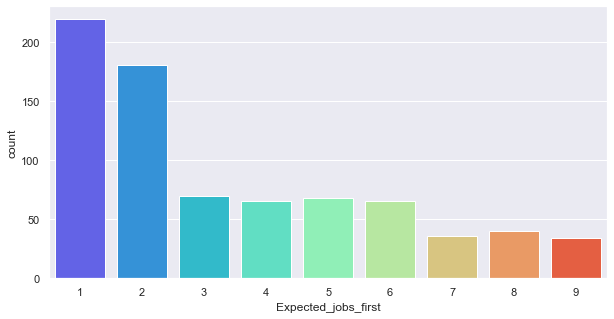

In [19]:
plt.rcParams['figure.figsize'] = [10, 5]
sns.countplot(x='Expected_jobs_first',data=first_digit_data,palette='rainbow')

[Text(0, 0.5, 'Percent')]

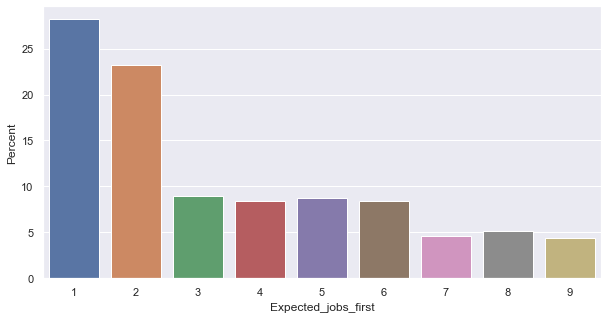

In [20]:
ax = sns.barplot(x="Expected_jobs_first", y="Expected_jobs_first", 
                 data=first_digit_data, 
                 estimator=lambda Expected_jobs_first: len(Expected_jobs_first) / len(first_digit_data) * 100)
ax.set(ylabel="Percent")

### Actual jobs

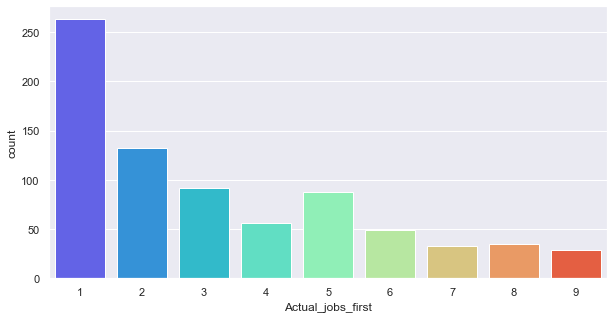

In [21]:
sns.countplot(x='Actual_jobs_first',data=first_digit_data,palette='rainbow')

[Text(0, 0.5, 'Percent')]

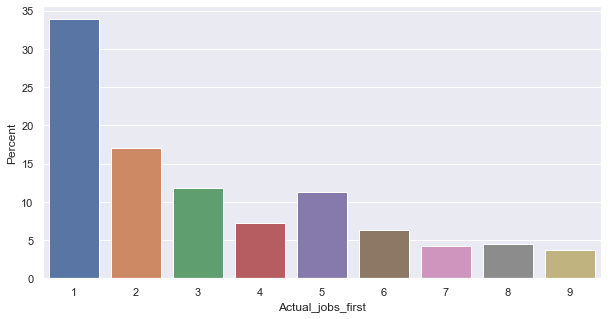

In [22]:
ax = sns.barplot(x="Actual_jobs_first", y="Actual_jobs_first", 
                 data=first_digit_data, 
                 estimator=lambda Actual_jobs_first: len(Actual_jobs_first) / len(first_digit_data) * 100)
ax.set(ylabel="Percent")

### Difference in Expected vs Actual jobs

In [23]:
jobs_data['diff'] = jobs_data['Expected_jobs'] - jobs_data['Actual_jobs']

In [24]:
jobs_data['diff_first'] = jobs_data['diff'].astype(str).str[0]

In [25]:
jobs_data.head()

,Expected_jobs,Actual_jobs,City,State,Expected_jobs_first,Actual_jobs_first,diff,diff_first
0,27,32,Alberton,Prince Edward Island,2,3,-5,-
1,431,396,Charlottetown,Prince Edward Island,4,3,35,3
3,40,41,Georgetown,Prince Edward Island,4,4,-1,-
4,156,145,Kensington,Prince Edward Island,1,1,11,1
6,8,9,Souris,Prince Edward Island,8,9,-1,-


In [26]:
jobs_data.loc[jobs_data['diff'] < 0]

,Expected_jobs,Actual_jobs,City,State,Expected_jobs_first,Actual_jobs_first,diff,diff_first
0,27,32,Alberton,Prince Edward Island,2,3,-5,-
3,40,41,Georgetown,Prince Edward Island,4,4,-1,-
6,8,9,Souris,Prince Edward Island,8,9,-1,-
9,136,140,Amherst,Nova Scotia,1,1,-4,-
11,91,94,Antigonish,Nova Scotia,9,9,-3,-
...,...,...,...,...,...,...,...,...
1182,102,103,Revelstoke,British Columbia,1,1,-1,-
1198,16,26,Dawson,Yukon,1,2,-10,-
1199,6,12,Faro,Yukon,6,1,-6,-
1201,23,25,Watson Lake,Yukon,2,2,-2,-


In [27]:
# ax = sns.barplot(x="diff_first", y="diff_first", 
#                  data=jobs_data, 
#                  estimator=lambda diff_first: len(diff_first) / len(jobs_data) * 100)
# ax.set(ylabel="Percent")

### All jobs on one graph (Expected Sorted, desending)

In [28]:
jobs_data.head()

,Expected_jobs,Actual_jobs,City,State,Expected_jobs_first,Actual_jobs_first,diff,diff_first
0,27,32,Alberton,Prince Edward Island,2,3,-5,-
1,431,396,Charlottetown,Prince Edward Island,4,3,35,3
3,40,41,Georgetown,Prince Edward Island,4,4,-1,-
4,156,145,Kensington,Prince Edward Island,1,1,11,1
6,8,9,Souris,Prince Edward Island,8,9,-1,-


In [34]:
plt.rcParams['figure.figsize'] = [7, 7]
new_1 = jobs_data[['Expected_jobs','Actual_jobs']] 
new_1 = new_1.sort_values(by=['Expected_jobs'], ascending=False).reset_index(drop=True)

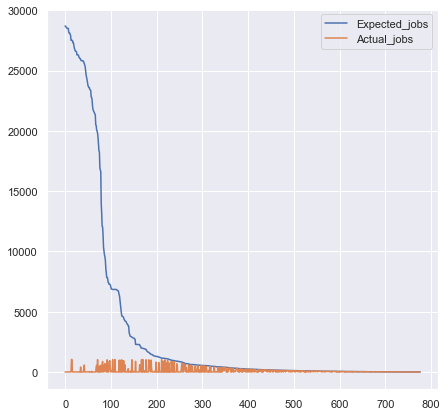

In [35]:
new_1.plot(kind='line')

(-50, 1500)

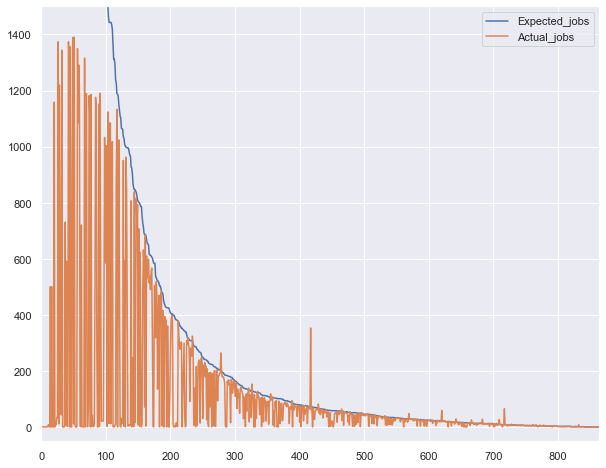

In [96]:
plt.rcParams['figure.figsize'] = [10, 8]
new_1.plot(kind='line', sort_columns=True)
plt.ylim(-50, 1500)

### All jobs on one graph (Actual Sorted, desending)

In [64]:
new_2 = jobs_data[['Expected_jobs','Actual_jobs']] 
new_2 = new_2.sort_values(by=['Actual_jobs'], ascending=False).reset_index(drop=True)

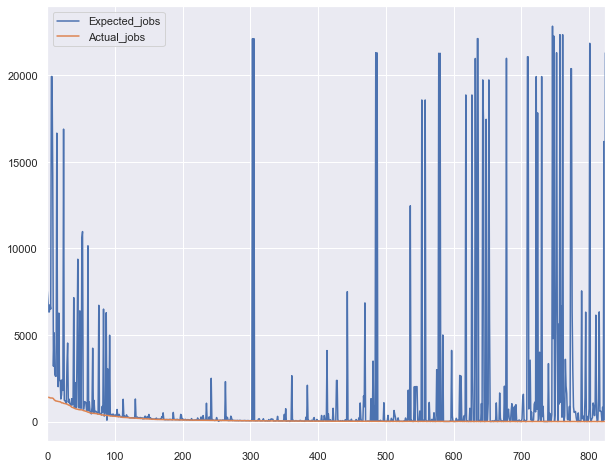

In [65]:
new_2.plot(kind='line')

(-50, 1100)

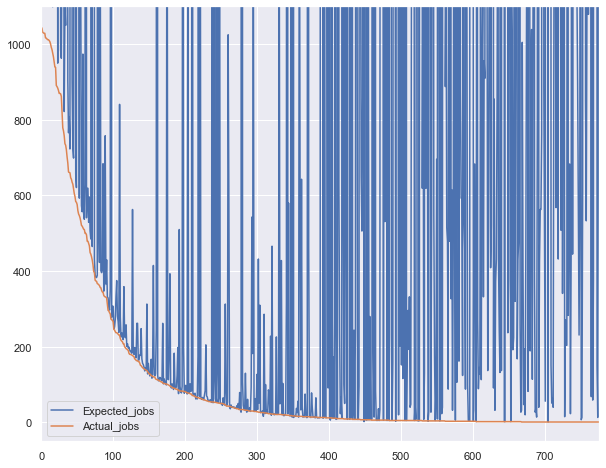

In [93]:
new_2.plot(kind='line', sort_columns=True)
plt.ylim(-50, 1100)

In [50]:
new_data = jobs_data.sort_values(by='Actual_jobs', ascending=False).reset_index(drop=True)

In [51]:
new_data.head()

,index,location,Actual_jobs,Actual_jobs_first
0,1876,"Calgary, AB",915,9
1,1726,"Greater Sudbury, ON",809,8
2,425,"Montréal, QC",792,7
3,797,"Ottawa, ON",717,7
4,1939,"Edmonton, AB",706,7


In [52]:
new_data.to_csv('sorted.csv', index=False)